# K-means and K-medoids

alunos: *Gabriel Ferreira, Giovanny Lira, Dayane Lira*

# introdução

Aplicaremos os método de K-means e K-medoids para classificar universidades como públicas ou privadas.

# Bibliotecas e Dataframe

primeiramente importamos as bibliotecas usadas

In [ ]:
!pip install scikit-learn-extra

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

E carregamos nossa base de dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gabriel-ferreira-da-silva/K-mean/main/dados/College.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


precimos converter o paramêtro Private de object para inteiro.

In [ ]:
Private = []
for p in df['Private']:
  if p == 'Yes':
    Private.append(1)
  else:
    Private.append(0)

In [ ]:
p = pd.DataFrame(Private, columns=['Private'])
df = df.drop('Private', axis = 1)
df = df.drop('Unnamed: 0', axis = 1)
df['Private'] = Private
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.727156
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.445708
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,1.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
 17  Private      777 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 109.4 KB


# Análise dos Dados


abaixo está o mapa de correlação dos dados

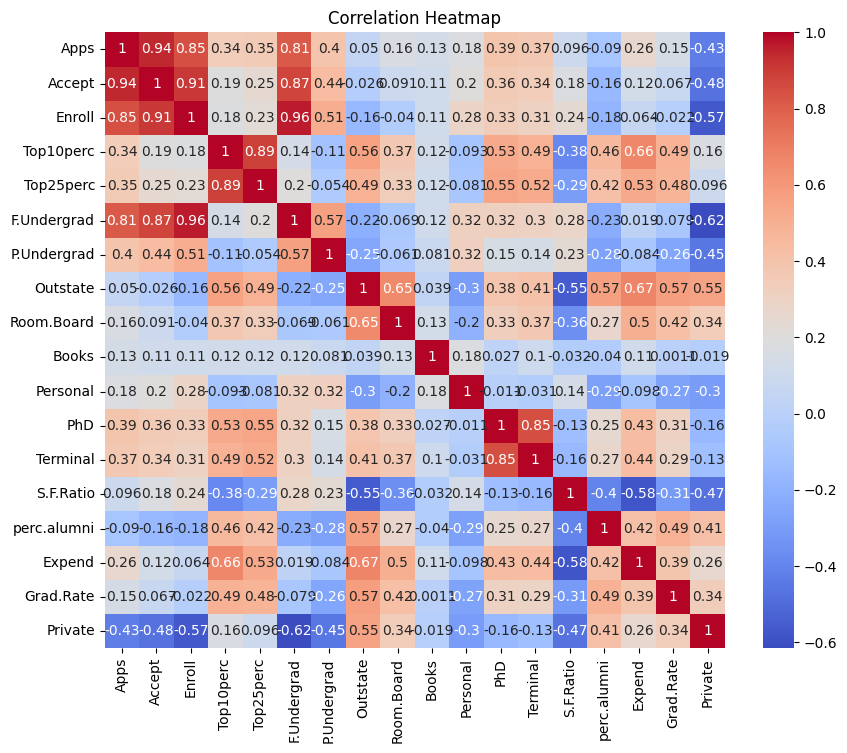

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

tambem analisaremos box-plots

In [ ]:
for feat in df:
  print(feat)

Apps
Accept
Enroll
Top10perc
Top25perc
F.Undergrad
P.Undergrad
Outstate
Room.Board
Books
Personal
PhD
Terminal
S.F.Ratio
perc.alumni
Expend
Grad.Rate
Private


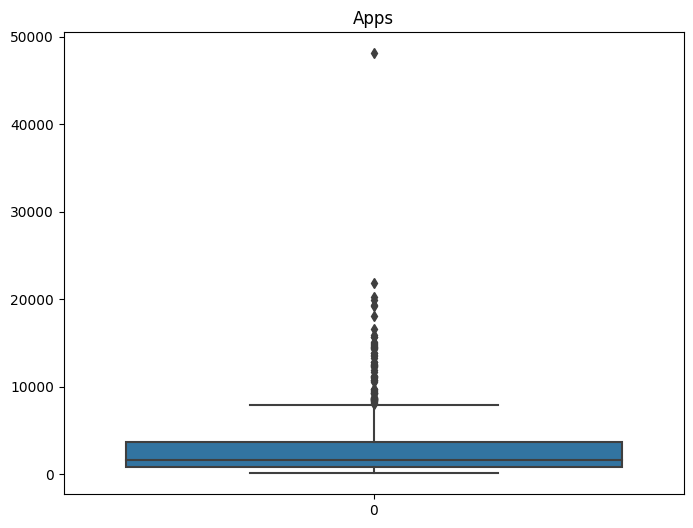

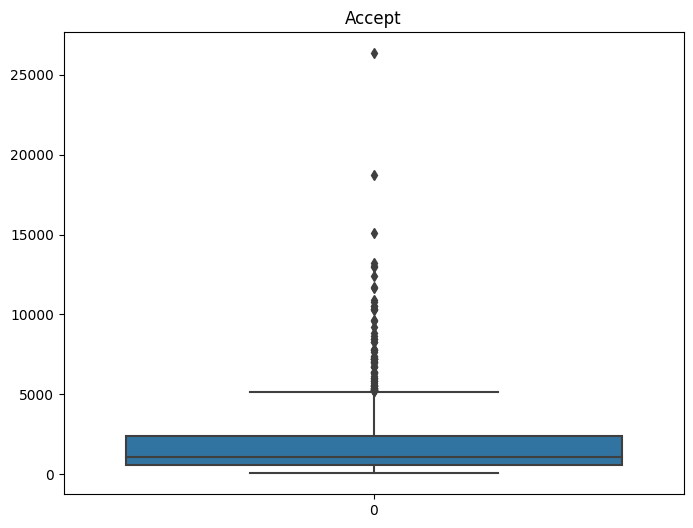

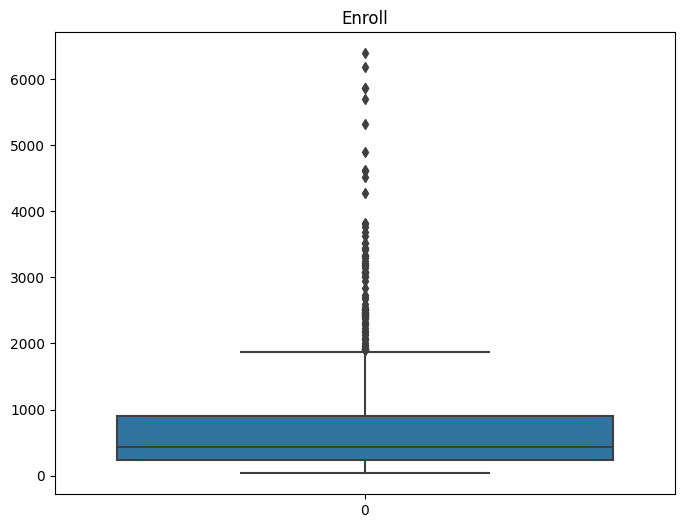

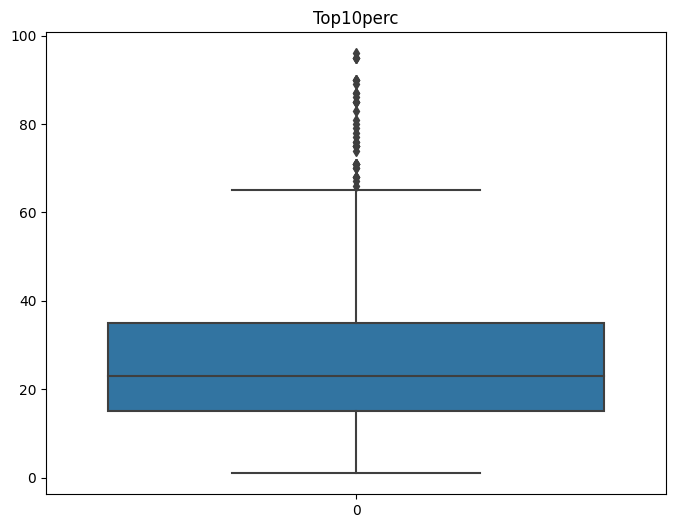

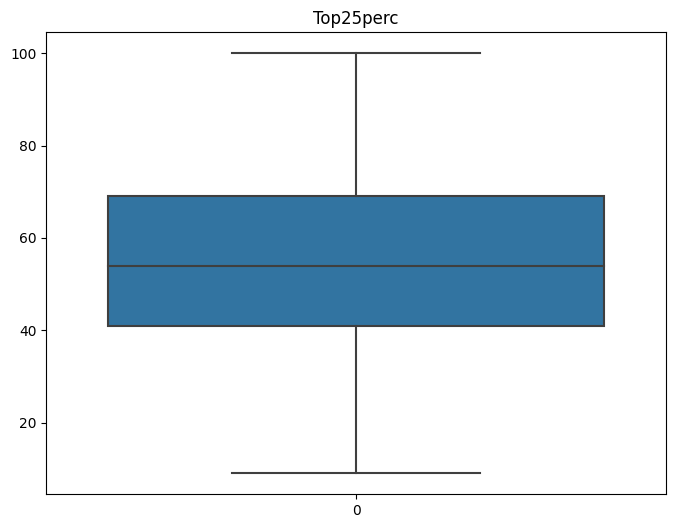

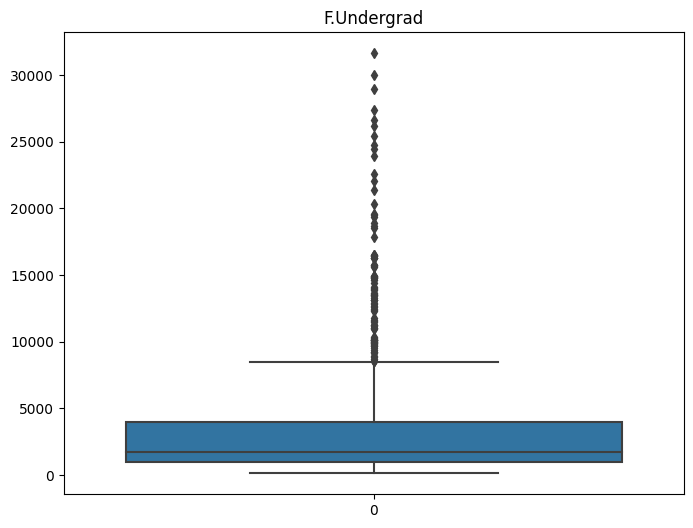

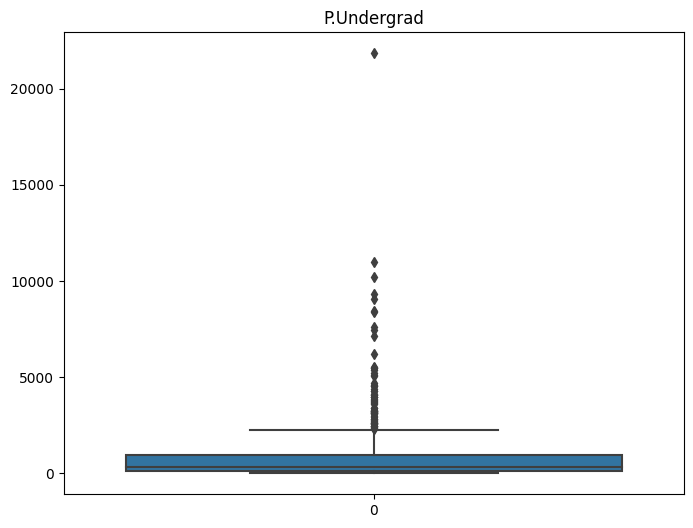

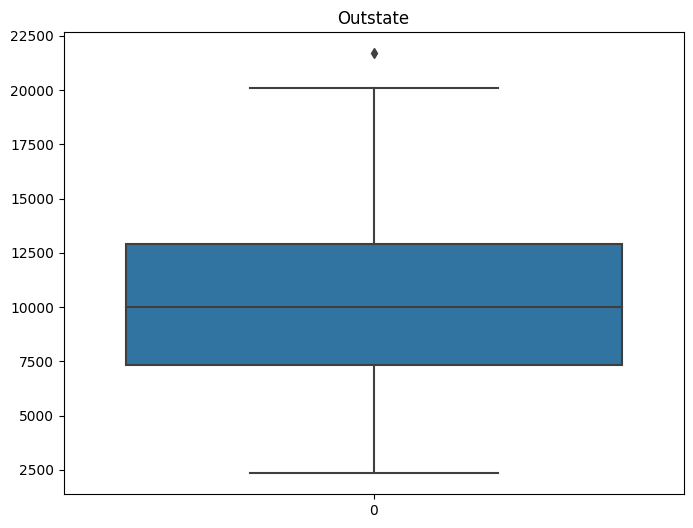

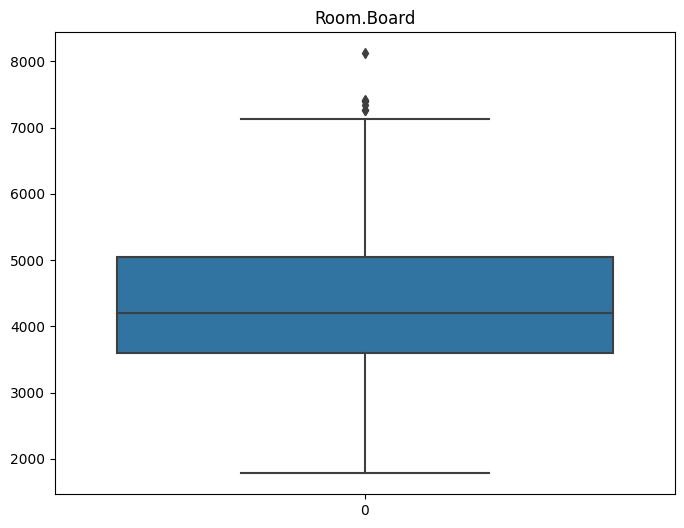

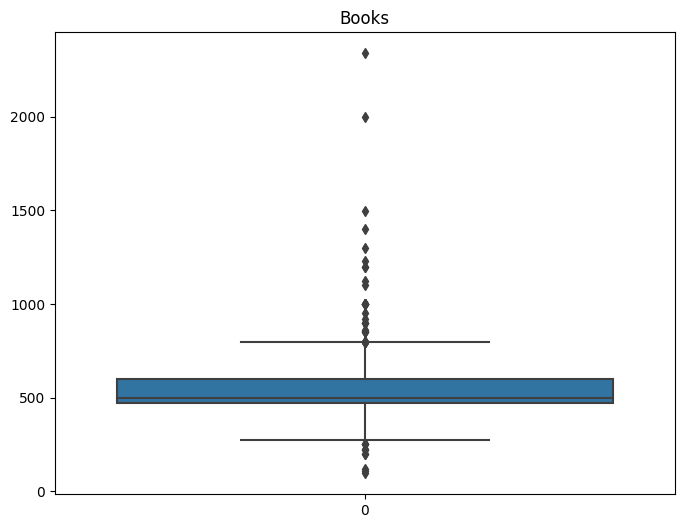

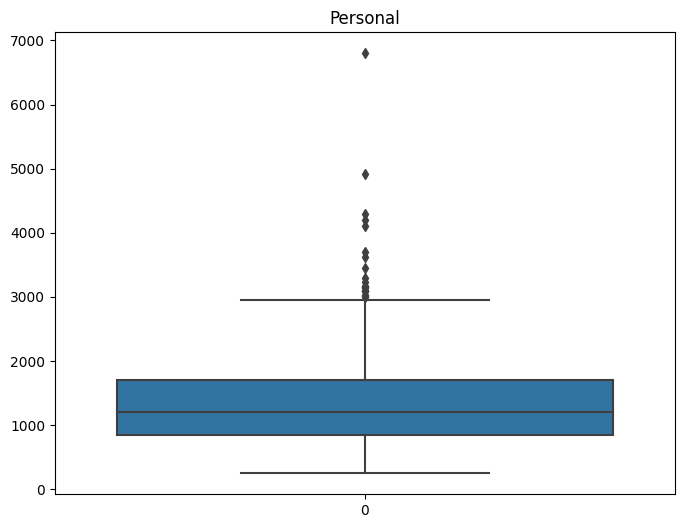

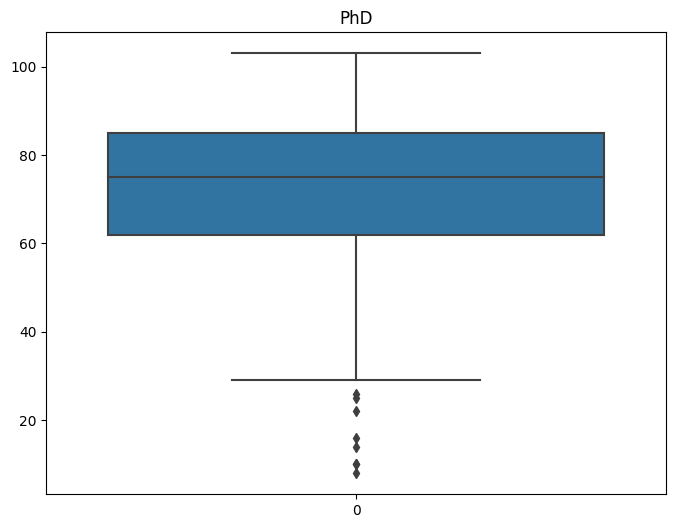

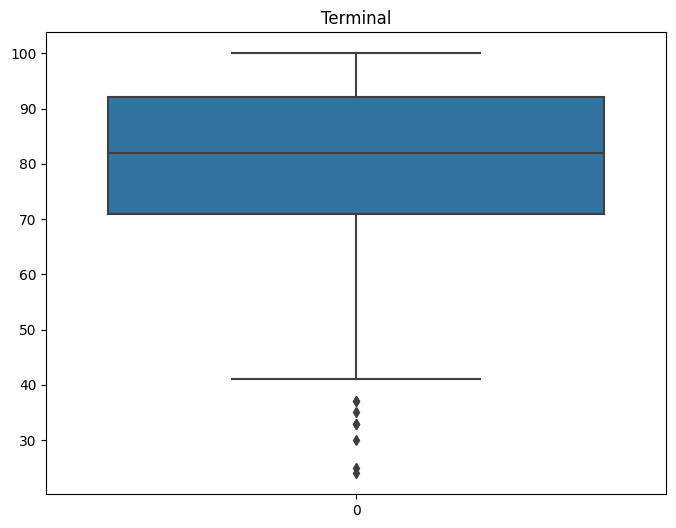

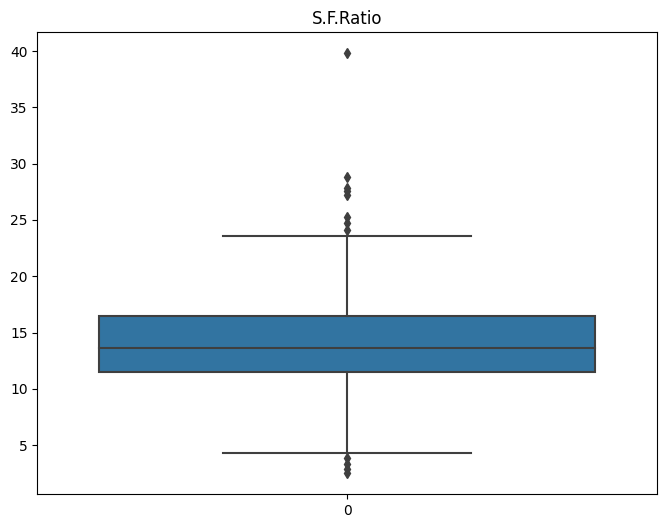

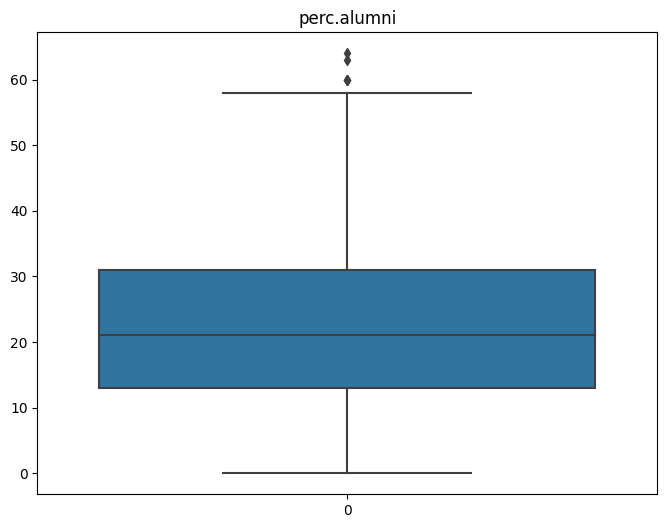

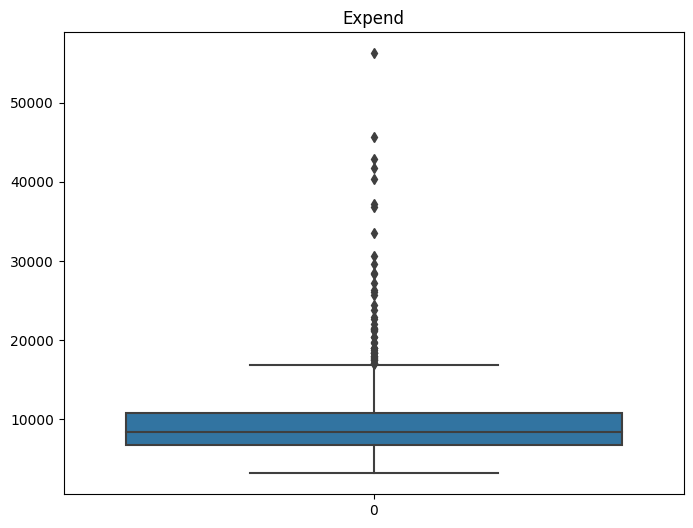

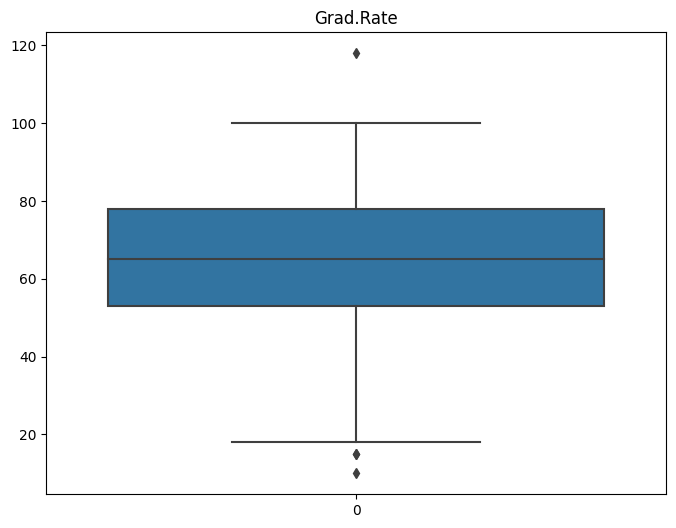

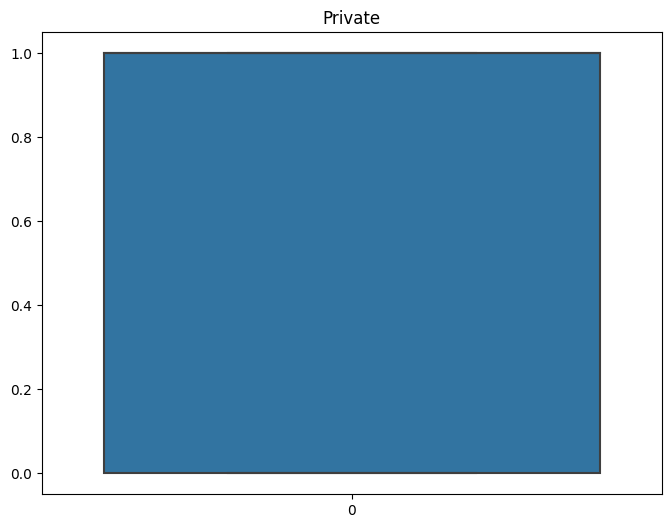

In [ ]:
for i in range(0, 18 ):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=df[df.columns[i]])
  plt.title(df.columns[i])
  plt.show()

vamos remover os outliers e checar os outliers e correlação com o dataframe limpo.

Apps
Accept
Enroll
Top10perc
Top25perc
F.Undergrad
P.Undergrad
Outstate
Room.Board
Books
Personal
PhD
Terminal
S.F.Ratio
perc.alumni
Expend
Grad.Rate


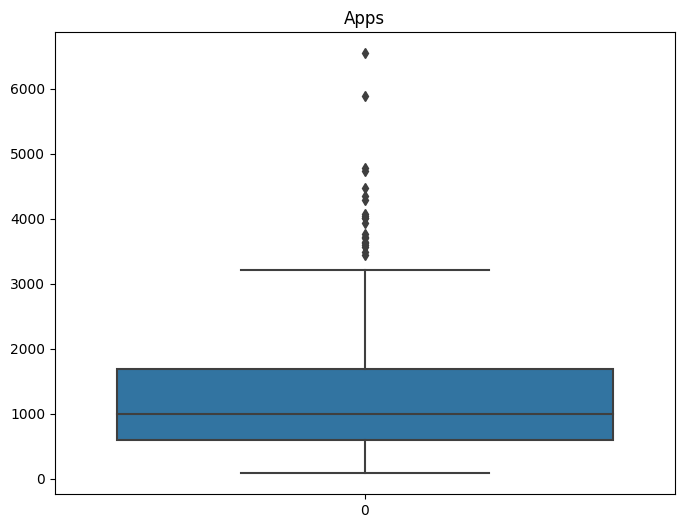

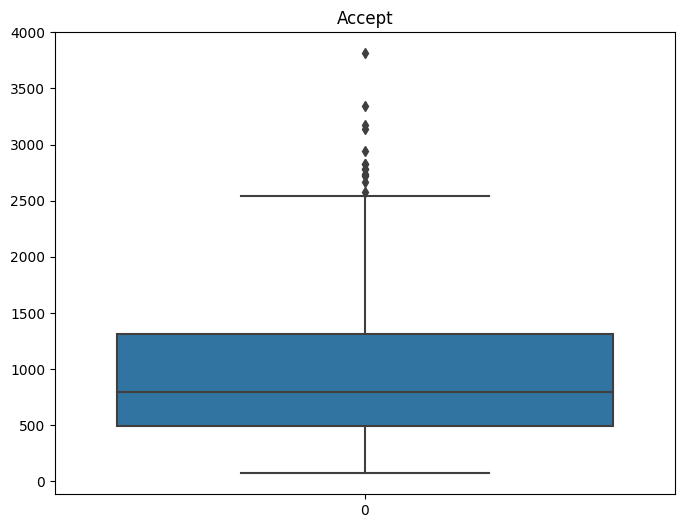

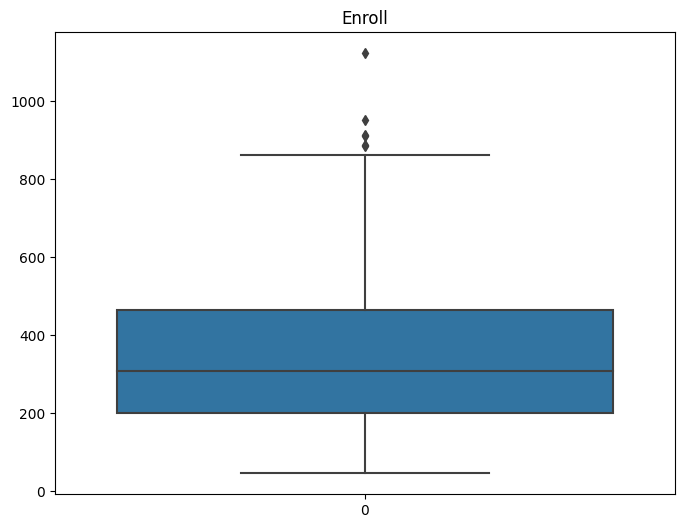

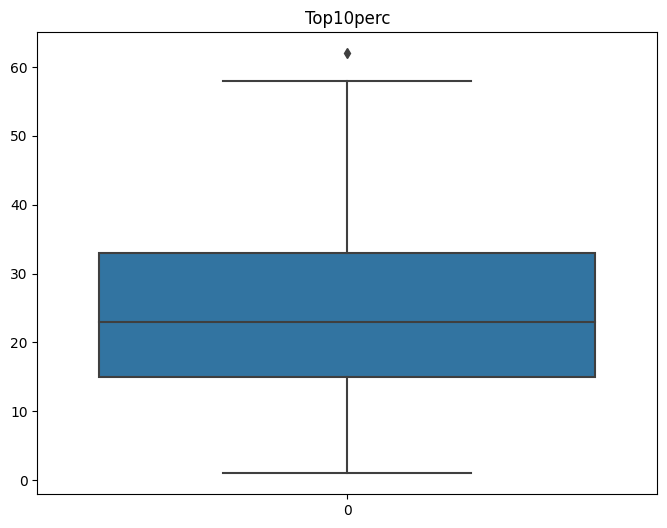

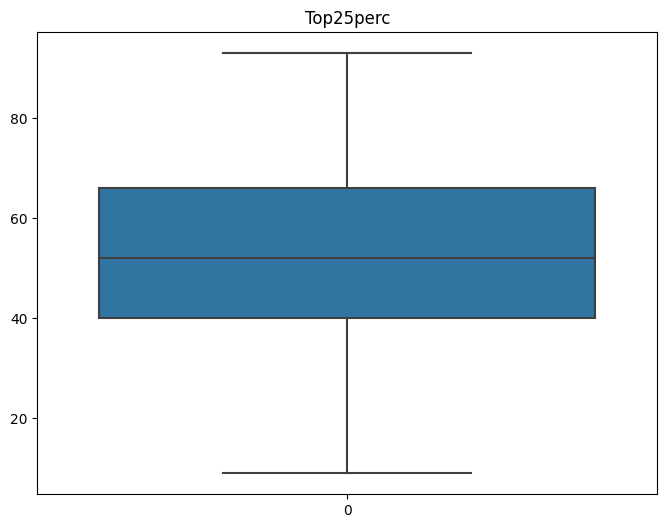

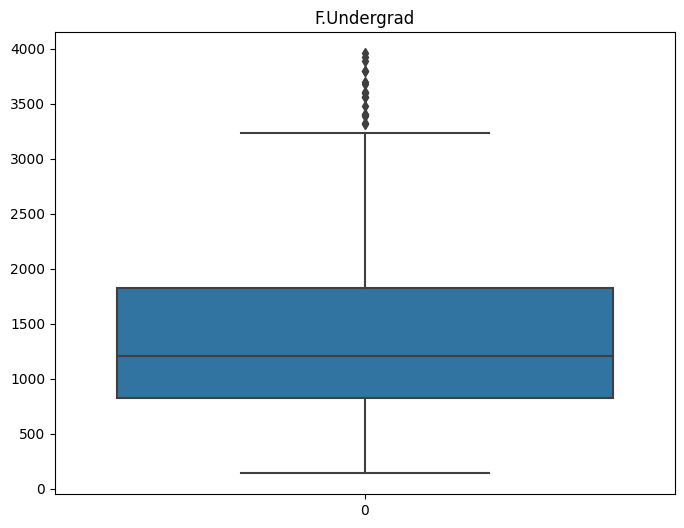

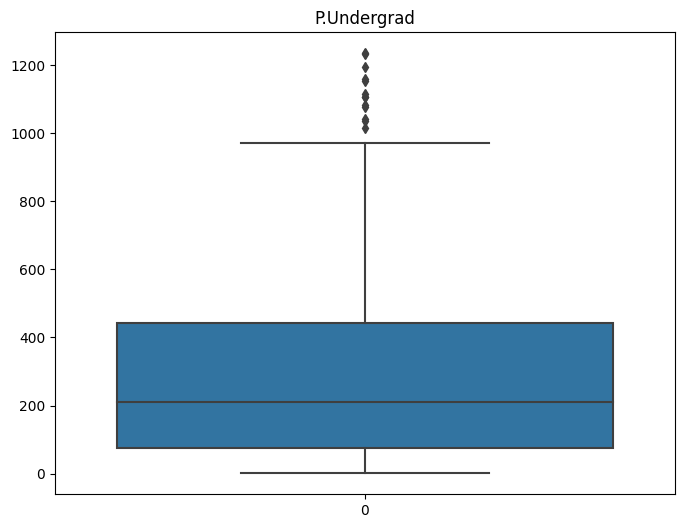

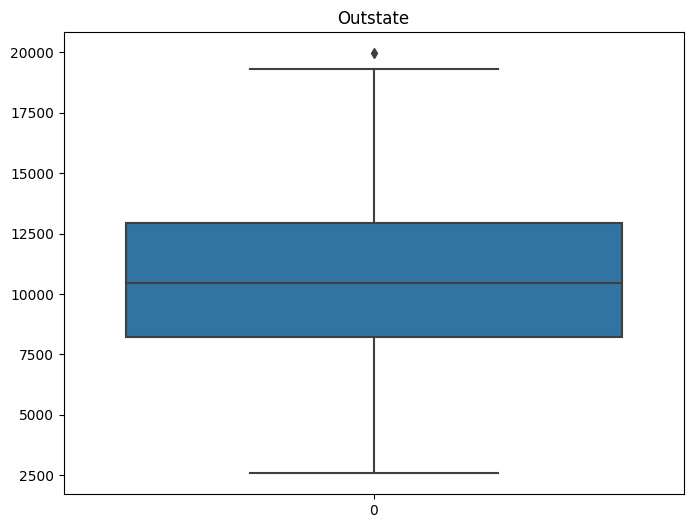

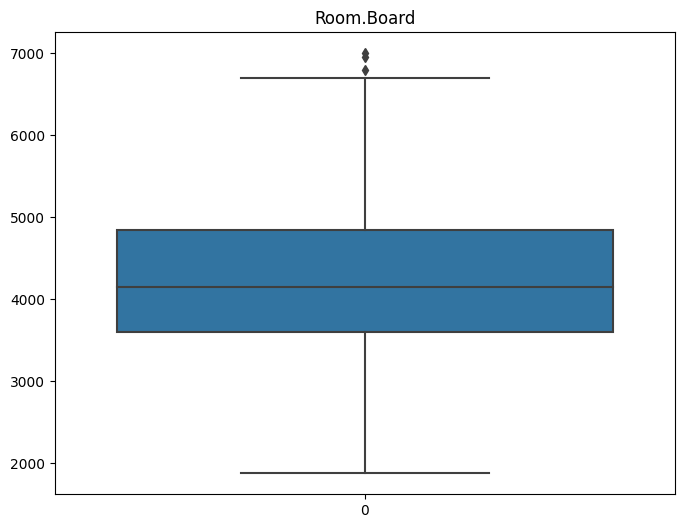

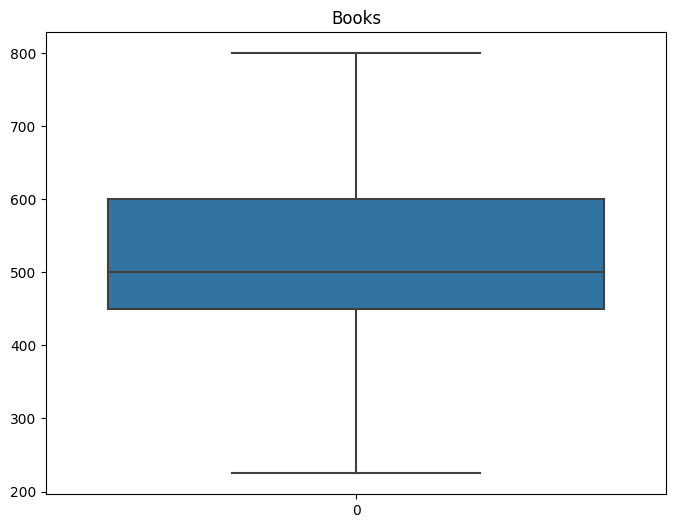

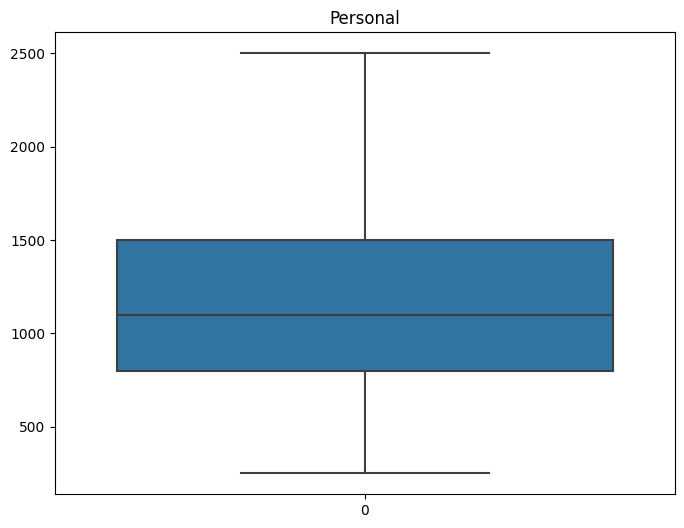

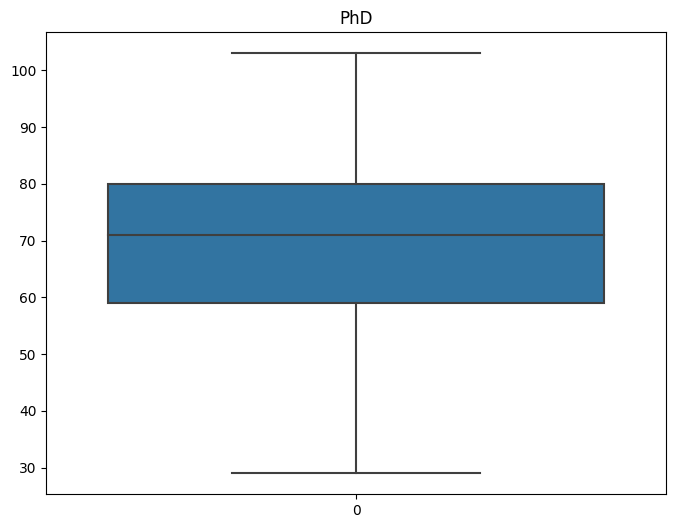

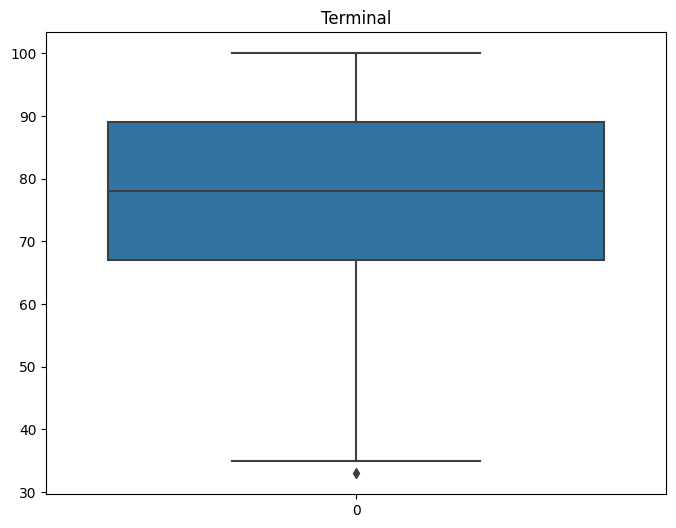

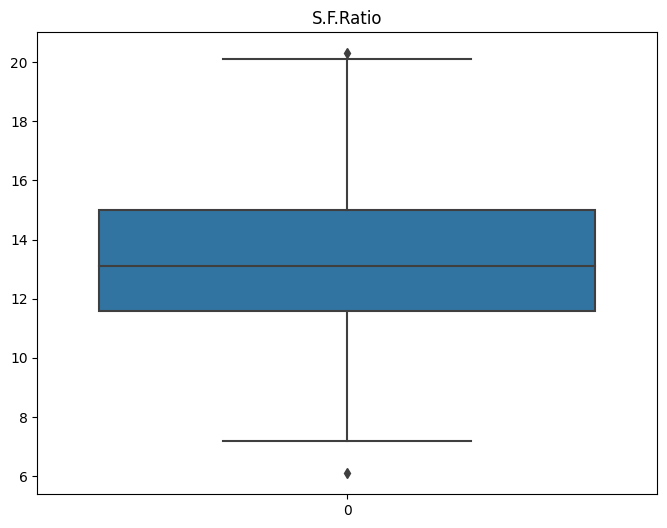

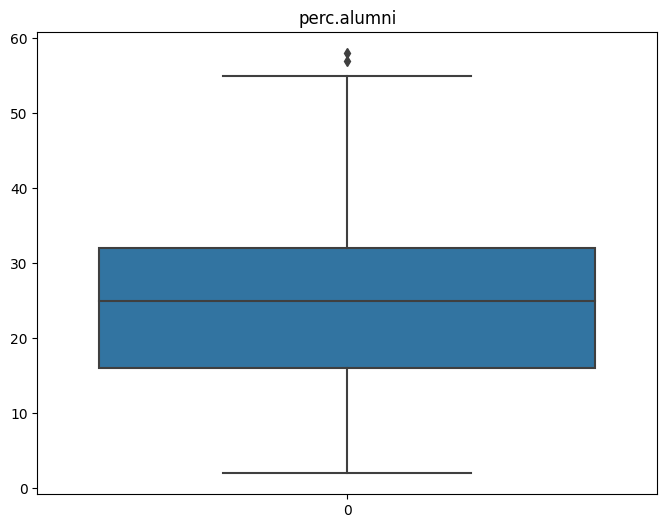

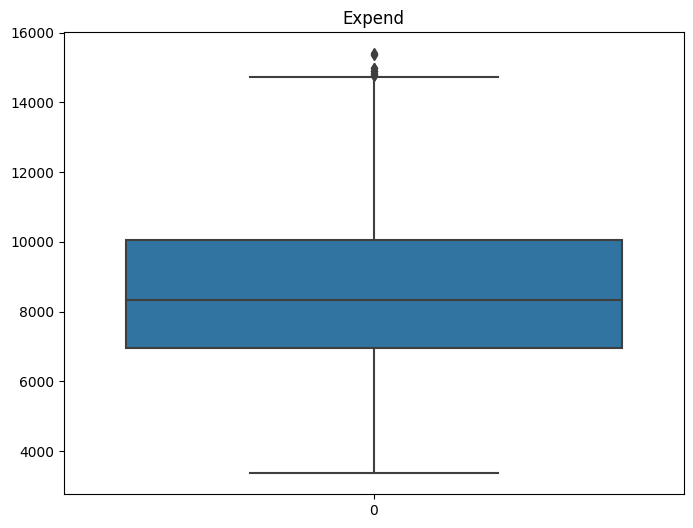

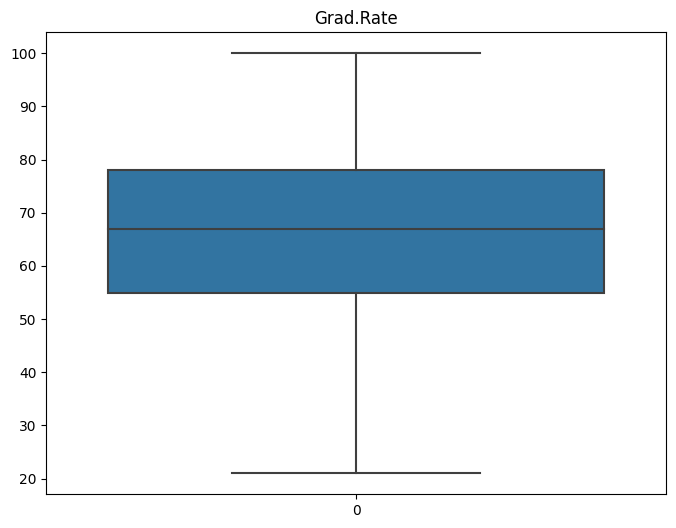

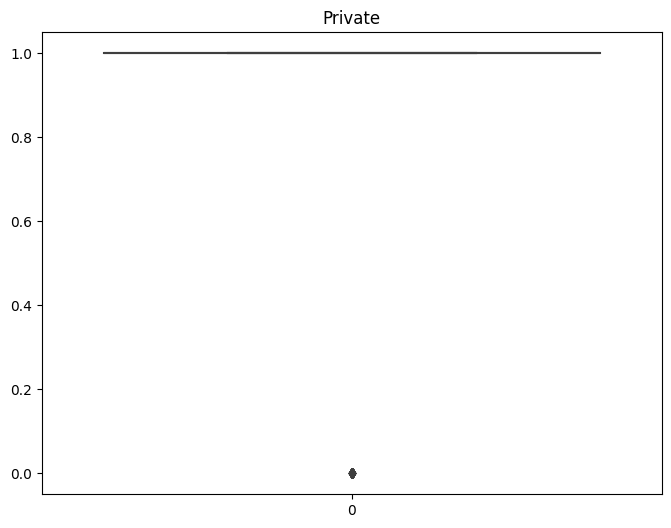

In [ ]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_cleaned

cdf = df
for column in cdf:
  if column !="Private":
    print(column)
    cdf = remove_outliers_iqr(cdf,column)

for i in range(0, 18 ):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=cdf[cdf.columns[i]])
  plt.title(cdf.columns[i])
  plt.show()

In [ ]:
cdf.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,1287.422472,967.157303,353.343820,24.874157,53.078652,1417.552809,297.912360,10613.332584,4266.921348,515.422472,1163.930337,69.784270,76.874157,13.432809,24.624719,8711.303371,66.065169,0.892135
std,961.633921,645.092296,196.882484,12.607462,17.482053,804.525782,281.004952,3463.667351,964.470076,97.902330,486.511573,14.973196,14.107930,2.516048,11.296807,2501.412008,15.856416,0.310559
min,81.000000,72.000000,46.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1880.000000,225.000000,250.000000,29.000000,33.000000,6.100000,2.000000,3365.000000,21.000000,0.000000
25%,600.000000,494.000000,200.000000,15.000000,40.000000,822.000000,74.000000,8236.000000,3600.000000,450.000000,800.000000,59.000000,67.000000,11.600000,16.000000,6955.000000,55.000000,1.000000
50%,996.000000,798.000000,307.000000,23.000000,52.000000,1202.000000,209.000000,10475.000000,4150.000000,500.000000,1100.000000,71.000000,78.000000,13.100000,25.000000,8324.000000,67.000000,1.000000
75%,1681.000000,1313.000000,465.000000,33.000000,66.000000,1819.000000,442.000000,12925.000000,4840.000000,600.000000,1500.000000,80.000000,89.000000,15.000000,32.000000,10062.000000,78.000000,1.000000
max,6548.000000,3813.000000,1123.000000,62.000000,93.000000,3957.000000,1235.000000,19964.000000,7000.000000,800.000000,2500.000000,103.000000,100.000000,20.300000,58.000000,15411.000000,100.000000,1.000000


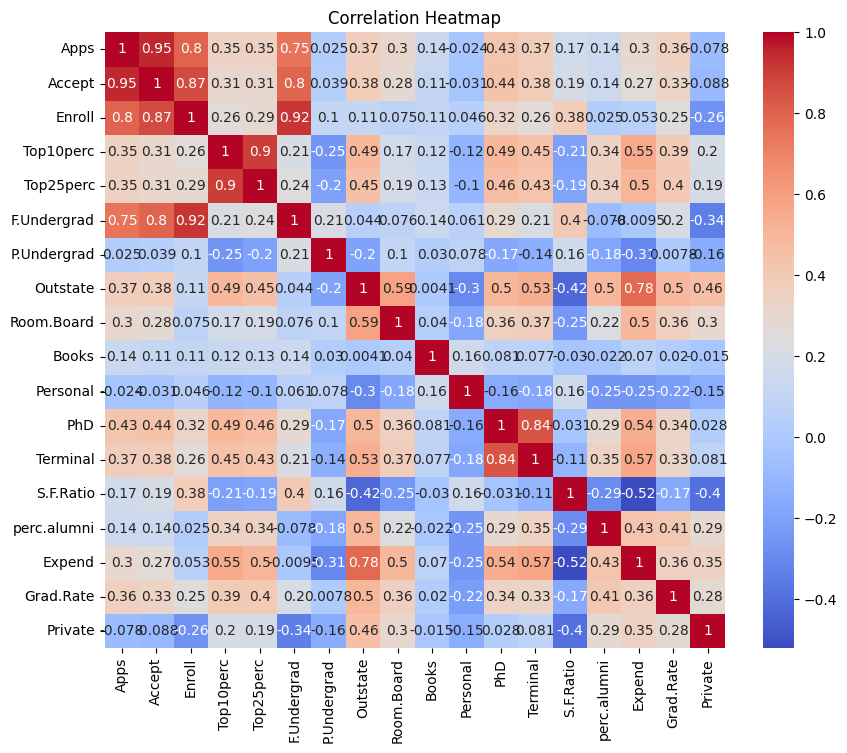

In [ ]:
correlation_matrix = cdf.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

vemos que a correlação entre atributos aumento no geral.

# cálculo K-medias e K-medoids

In [ ]:
df = cdf
df.shape

(445, 18)

In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[df.columns])
df_scale = pd.DataFrame(scale, columns = df.columns);
df_scale.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,0.244163,0.310078,0.626741,0.360656,0.511905,0.719225,0.434360,0.279567,0.277344,0.391304,0.866667,0.554054,0.671642,0.845070,0.178571,0.305164,0.493671,1.0
1,0.208288,0.273991,0.269266,0.344262,0.488095,0.234940,0.079417,0.498734,0.365234,0.304348,0.406667,0.324324,0.492537,0.478873,0.500000,0.445791,0.417722,1.0
2,0.078243,0.108794,0.103993,0.606557,0.630952,0.141173,0.032415,0.628164,0.284180,0.478261,0.188889,0.513514,0.597015,0.232394,0.160714,0.528142,0.430380,1.0
3,0.042060,0.071639,0.052925,0.262295,0.428571,0.072551,0.185575,0.616084,0.750000,0.478261,0.555556,0.824324,0.895522,0.380282,0.428571,0.456251,0.531646,1.0
4,0.281120,0.440524,0.411328,0.590164,0.702381,0.381090,0.025122,0.649333,0.575391,0.391304,0.266667,0.810811,1.000000,0.535211,0.625000,0.674249,0.658228,1.0


In [ ]:
EM = []
CH = []
CH.append(None)
DB = []
DB.append(None)
SI = []
SI.append(None)
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++').fit(df_scale)
    EM.append(kmeans.inertia_)

    labels = kmeans.labels_
    labels = kmeans.labels_
    if cluster >1:
      CH.append(metrics.calinski_harabasz_score(df_scale, labels))
      DB.append(metrics.davies_bouldin_score(df_scale, labels))
      SI.append(metrics.silhouette_score(df_scale, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

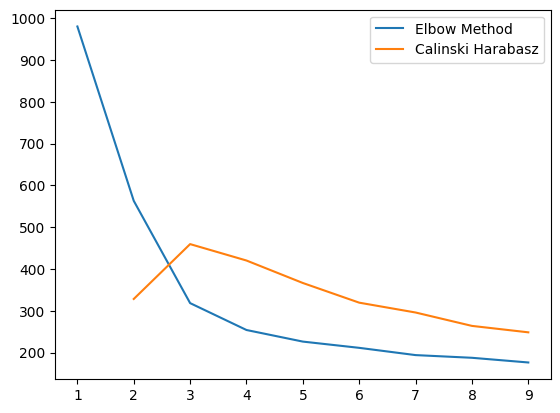

In [ ]:
# converting the results into a dataframe and plotting them
X = range(1,10)
plt.plot(X, EM, label = 'Elbow Method')
plt.plot(X, CH, label = 'Calinski Harabasz')
plt.legend()
plt.show()

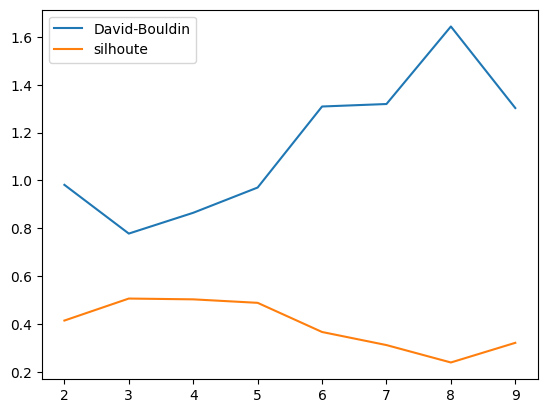

In [ ]:
X = range(1,10)
plt.plot(X, DB, label = 'David-Bouldin')
plt.plot(X, SI, label = 'silhoute')
plt.legend()
plt.show()

In [ ]:
num_clusters = 3

km=KMeans(n_clusters= num_clusters)
y_predicted = km.fit_predict(df_scale[df.columns])
y_predicted.size
df_scale["Clusters"] = y_predicted

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(df_scale)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(df_scale, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


536.1232780509655

In [ ]:
df_scale.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private,Clusters
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.186551,0.239283,0.285370,0.391380,0.524746,0.334875,0.240610,0.462111,0.466196,0.505083,0.406191,0.551139,0.654838,0.516395,0.404013,0.443824,0.570445,0.892135,0.840449
std,0.148699,0.172438,0.182806,0.206680,0.208120,0.210719,0.227719,0.199245,0.188373,0.170265,0.216227,0.202340,0.210566,0.177186,0.201729,0.207655,0.200714,0.310559,0.932003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080254,0.112804,0.142990,0.229508,0.369048,0.178889,0.059157,0.325357,0.335938,0.391304,0.244444,0.405405,0.507463,0.387324,0.250000,0.298024,0.430380,1.000000,0.000000
50%,0.141488,0.194066,0.242340,0.360656,0.511905,0.278418,0.168558,0.454153,0.443359,0.478261,0.377778,0.567568,0.671642,0.492958,0.410714,0.411672,0.582278,1.000000,0.000000
75%,0.247410,0.331729,0.389044,0.524590,0.678571,0.440021,0.357374,0.595087,0.578125,0.652174,0.555556,0.689189,0.835821,0.626761,0.535714,0.555952,0.721519,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
EM = []
CH = []
CH.append(None)
DB = []
DB.append(None)
SI = []
SI.append(None)
for cluster in range(1,10):
    kmeans = KMedoids(n_clusters = cluster, init='k-medoids++').fit(df_scale)
    EM.append(kmeans.inertia_)

    labels = kmeans.labels_
    if cluster >1:
      CH.append(metrics.calinski_harabasz_score(df_scale, labels))
      DB.append(metrics.davies_bouldin_score(df_scale, labels))
      SI.append(metrics.silhouette_score(df_scale, labels))

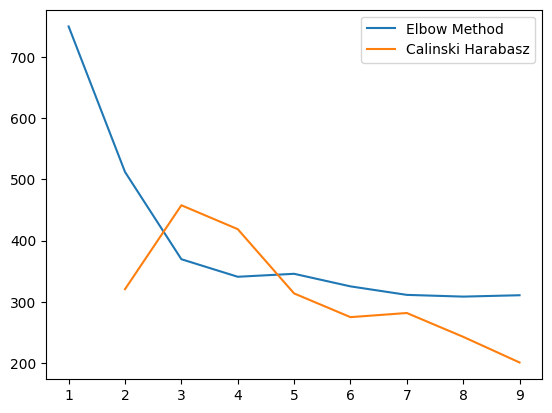

In [ ]:
# converting the results into a dataframe and plotting them
X = range(1,10)
plt.plot(X, EM, label = 'Elbow Method')
plt.plot(X, CH, label = 'Calinski Harabasz')
plt.legend()
plt.show()

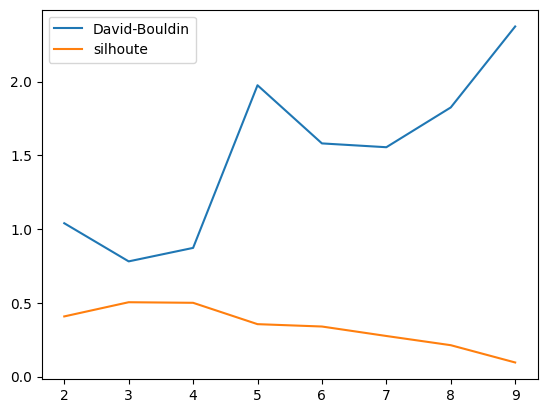

In [ ]:
X = range(1,10)
plt.plot(X, DB, label = 'David-Bouldin')
plt.plot(X, SI, label = 'silhoute')
plt.legend()
plt.show()

In [ ]:
num_clusters = 3

km=KMedoids(n_clusters= num_clusters)
y_predicted = km.fit_predict(df_scale[df.columns])
y_predicted.size
df_scale["Clusters_medoids"] = y_predicted


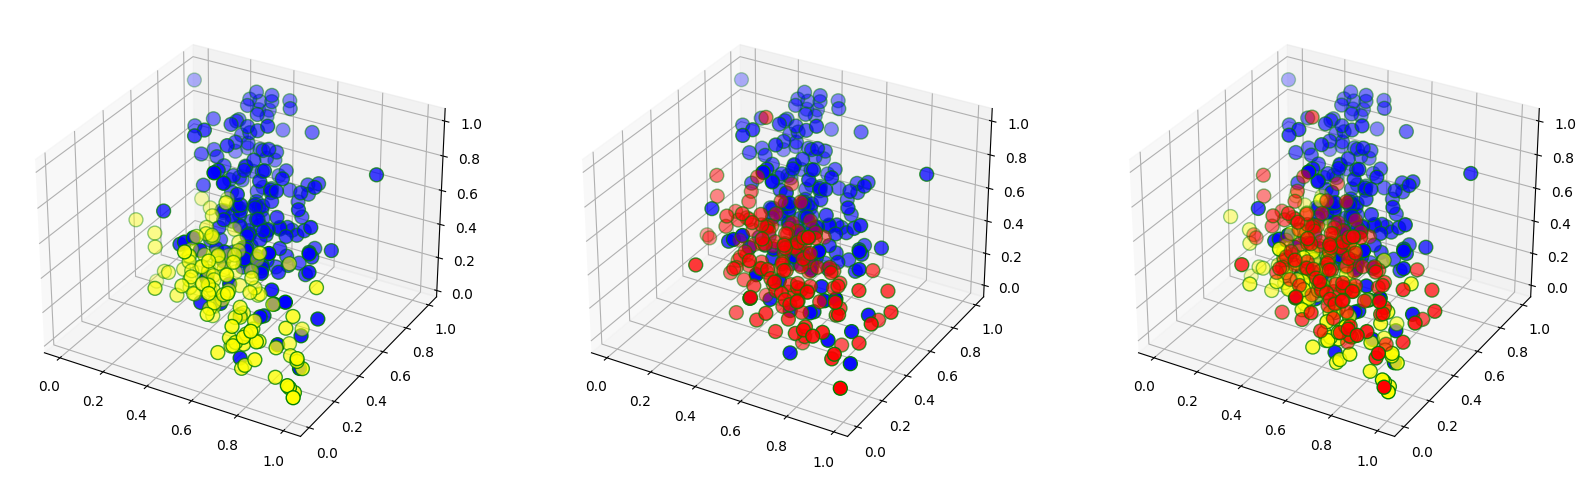

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 0], df_scale["Outstate"][df_scale.Clusters_medoids == 0], df_scale["Expend"][df_scale.Clusters_medoids == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 1], df_scale["Outstate"][df_scale.Clusters_medoids == 1], df_scale["Expend"][df_scale.Clusters_medoids == 1], c='blue', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,2, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 1], df_scale["Outstate"][df_scale.Clusters_medoids == 1], df_scale["Expend"][df_scale.Clusters_medoids == 1], c='blue', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 2], df_scale["Outstate"][df_scale.Clusters_medoids == 2], df_scale["Expend"][df_scale.Clusters_medoids == 2], c='red', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,3, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 0], df_scale["Outstate"][df_scale.Clusters_medoids == 0], df_scale["Expend"][df_scale.Clusters_medoids == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 1], df_scale["Outstate"][df_scale.Clusters_medoids == 1], df_scale["Expend"][df_scale.Clusters_medoids == 1], c='blue', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 2], df_scale["Outstate"][df_scale.Clusters_medoids == 2], df_scale["Expend"][df_scale.Clusters_medoids == 2], c='red', s=100, edgecolor='green',linestyle='-')

plt.show()

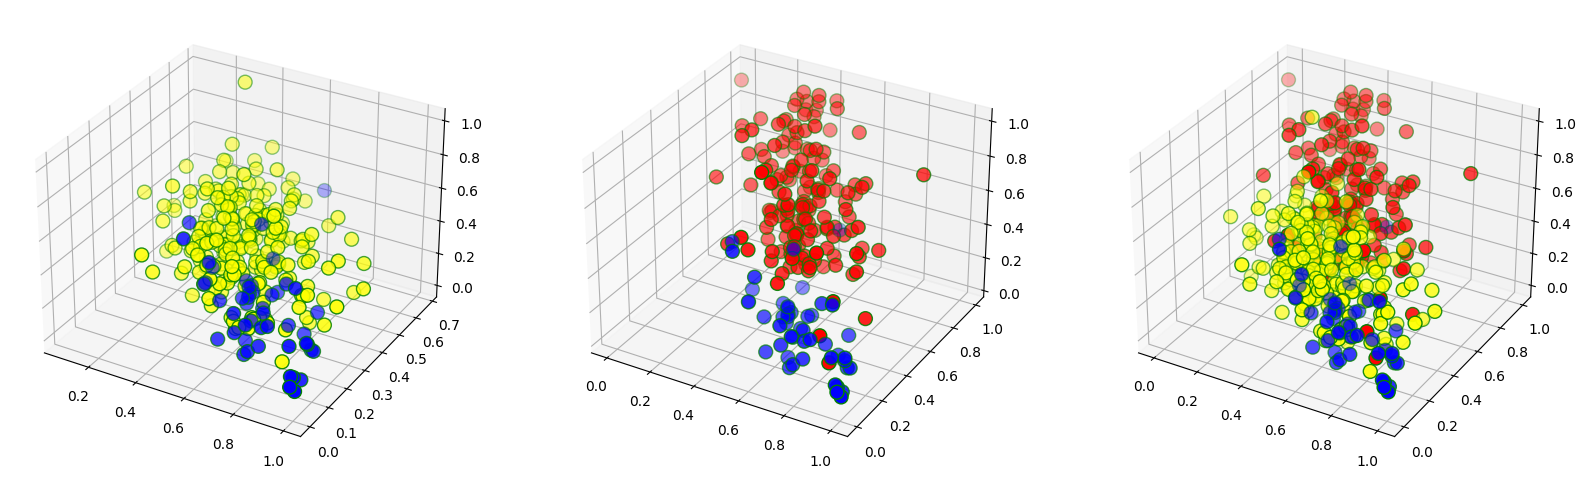

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 0], df_scale["Outstate"][df_scale.Clusters == 0], df_scale["Expend"][df_scale.Clusters == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 1], df_scale["Outstate"][df_scale.Clusters == 1], df_scale["Expend"][df_scale.Clusters == 1], c='blue', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,2, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 1], df_scale["Outstate"][df_scale.Clusters == 1], df_scale["Expend"][df_scale.Clusters == 1], c='blue', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 2], df_scale["Outstate"][df_scale.Clusters == 2], df_scale["Expend"][df_scale.Clusters == 2], c='red', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,3, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 0], df_scale["Outstate"][df_scale.Clusters == 0], df_scale["Expend"][df_scale.Clusters == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 1], df_scale["Outstate"][df_scale.Clusters == 1], df_scale["Expend"][df_scale.Clusters == 1], c='blue', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 2], df_scale["Outstate"][df_scale.Clusters == 2], df_scale["Expend"][df_scale.Clusters == 2], c='red', s=100, edgecolor='green',linestyle='-')

plt.show()

# Análise dos clusters

vamos ver como cada variável está distribuida nos clusters.

<ipython-input-174-b6e7f97a3629>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_scale[df_scale.columns[18:]].hist(ax=ax)


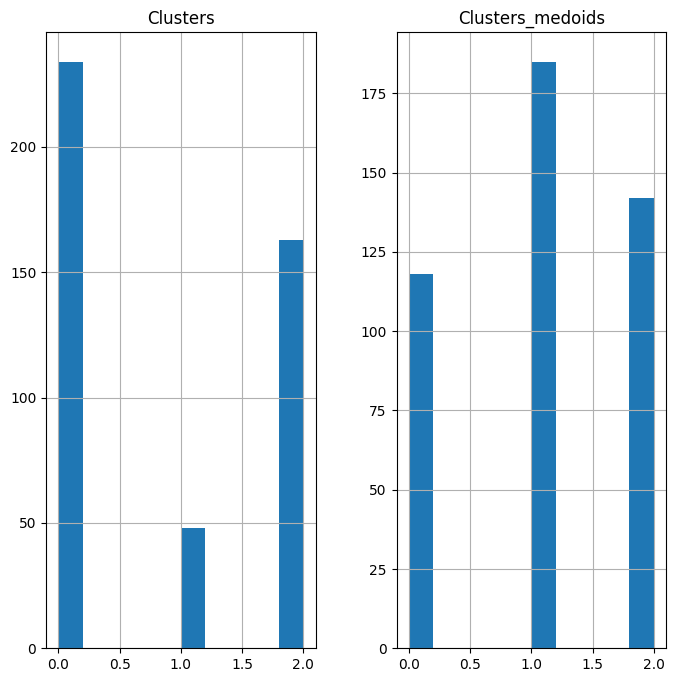

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
df_scale[df_scale.columns[18:]].hist(ax=ax)
plt.show()


In [ ]:
cluster_means = df_scale.groupby('Clusters')['Private']
print(cluster_means)
cluster_means.describe()

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,234.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,163.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
